In [204]:
library(data.table)
source("/net/fantasia/home/yjingj/Scripts/Rscript/R_Funcs/LoadData_func.r")
source("/net/fantasia/home/yjingj/Scripts/Rscript/R_Funcs/qplot_func.r")

data_dir="/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/"


In [146]:
Geno = fread("/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/CFH_REGION_1KG.geno", 
            header = TRUE)
setkey(Geno, ID)

Pheno = read.table("/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/ExData/phenoAMD_1KG.txt")
#head(Pheno)
pheno_id = colnames(Geno)[-(1:5)]
Pheno[, 2] = Pheno[, 2] - mean(Pheno[, 2])
mean(Pheno[, 2])
var(Pheno[, 2])
#length(pheno_id)
#head(pheno_id)



[1] 7.881033e-18

[1] 0.250064

In [217]:

paramdata_SS = Load_bfGWAS_SS(paste(data_dir, filehead, "_SS.paramtemp", sep=""), header = FALSE)
dim(paramdata_SS)

VarSS = fread("/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/CFH_REGION_1KG_SS.VarSS", 
                  header = TRUE)
setnames(VarSS, c("ID", "CHR", "POS", "REF", "ALT", "beta", "beta_sd", "MAF", "xtx") )
setkey(VarSS, ID)
head(VarSS)
dim(VarSS)

[1] 3689   12

ID,CHR,POS,REF,ALT,beta,beta_sd,MAF,xtx
esv3588466,1,196602664,<CN0>,A,-0.1159780,0.0380308,0.0343450,172.1850
esv3588478,1,196782355,<CN0>,G,0.0831023,0.0506731,0.0193690,97.2424
esv3588481,1,196852281,<CN0>,T,0.1162310,0.0538265,0.0169728,86.1146
esv3588483,1,196886381,<INS:ME:ALU>,A,0.1597630,0.0454223,0.0253594,120.5590
rs1009188,1,197257090,C,T,0.0143283,0.0175096,0.1892970,815.0930
rs10159146,1,196181359,G,A,0.0872630,0.0622940,0.9872200,64.3642


[1] 3689    9

In [ ]:
X = as.data.frame(t(Geno[paramdata_SS$ID, -(1:5), with = FALSE]) )
dim(X)
#apply(X, 2, mean) / 2
X = scale(X, center = TRUE, scale = FALSE)

XtX = t(X) %*% X 

mybeta = t(X) %*% Pheno[, 2] / diag(XtX)


[1] 2504 3690

[1] 2504    3

[1] 3 3

[1] 3689   12

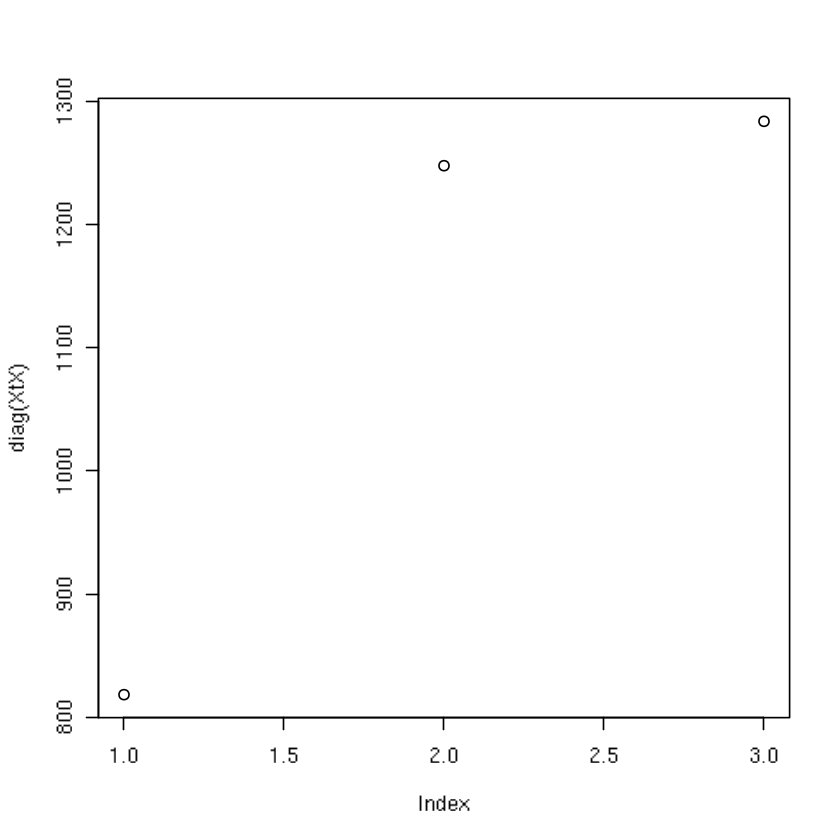

In [202]:
#length(mybeta)
#length(paramdata_SS$beta)
dim(X)
#dim(Pheno)
#plot(paramdata_SS$beta, t(mybeta)
#abline(0, 1)

dim(XtX)
dim( paramdata_SS)

plot(diag(XtX),)
abline(0, 1)

In [215]:
test_snp = paramdata_SS$ID[paramdata_SS$rank %in% c(2, 9, 19, 244, 3364) ]
paramdata_SS[test_snp, ]

X = as.data.frame(t(Geno[test_snp, -(1:5), with = FALSE]) )
colnames(X) = test_snp
#apply(X, 2, mean) / 2
X = scale(X, center = TRUE, scale = FALSE)

test_data = data.frame(y = Pheno[, 2], X)
#head(test_data)

fit = lm(y~., data = test_data)
summary(fit)

ID,chr,bp,ref,alt,maf,func,beta,pi,Chi2,pval_Chi2,rank
rs10922109,1,196704632,A,C,0.50758790,0,-7.7027360,1,146.5545000,9.820425e-34,2
rs115235829,1,196202139,C,T,0.01757188,0,4.2649070,1,12.0784000,5.100931e-04,244
rs559637118,1,196679909,GT,G,0.50738820,5,6.1103660,1,141.5647000,1.210765e-32,9
rs567086291,1,196674330,AT,A,0.72044730,5,0.3272705,1,0.1239281,7.248125e-01,3364
rs7540032,1,196701284,T,C,0.48222840,0,1.4189840,1,123.6698000,9.949866e-29,19



Call:
lm(formula = y ~ ., data = test_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7863 -0.4396 -0.2282  0.4357  0.8142 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.333e-16  9.614e-03   0.000  1.00000    
rs10922109  -2.512e-01  9.277e-02  -2.708  0.00682 ** 
rs115235829  1.351e-01  5.126e-02   2.637  0.00843 ** 
rs559637118 -2.592e-03  8.399e-02  -0.031  0.97539    
rs567086291  1.247e-01  1.724e-02   7.234 6.22e-13 ***
rs7540032    4.231e-02  4.274e-02   0.990  0.32232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4811 on 2498 degrees of freedom
Multiple R-squared:  0.07635,	Adjusted R-squared:  0.0745 
F-statistic:  41.3 on 5 and 2498 DF,  p-value: < 2.2e-16


In [214]:
idx= sort(which(paramdata_SS$rank %in% c(2, 9, 19, 244, 3364)))
test_snp = paramdata_SS$ID[idx]
paramdata_SS[test_snp, ]

X = as.data.frame(t(Geno[test_snp, -(1:5), with = FALSE]) )
colnames(X) = test_snp
#apply(X, 2, mean) / 2
X = scale(X, center = TRUE, scale = FALSE)

XtX = t(X) %*% (X)
XtX
Xty = t(X) %*% Pheno[, 2]
Xty
solve(XtX) %*% Xty

#VarSS[test_snp, ]
#diag(XtX) 
#mybeta = (Xty)  / diag(XtX) 
#mybeta

head(Pheno[, 2])

[1]   82  612 2716 2750 3236

ID,chr,bp,ref,alt,maf,func,beta,pi,Chi2,pval_Chi2,rank
rs10922109,1,196704632,A,C,0.50758790,0,-7.7027360,1,146.5545000,9.820425e-34,2
rs115235829,1,196202139,C,T,0.01757188,0,4.2649070,1,12.0784000,5.100931e-04,244
rs559637118,1,196679909,GT,G,0.50738820,5,6.1103660,1,141.5647000,1.210765e-32,9
rs567086291,1,196674330,AT,A,0.72044730,5,0.3272705,1,0.1239281,7.248125e-01,3364
rs7540032,1,196701284,T,C,0.48222840,0,1.4189840,1,123.6698000,9.949866e-29,19


,rs10922109,rs115235829,rs559637118,rs567086291,rs7540032
rs10922109,1259.42332,-47.33546,1248.43850,536.24601,1190.3506
rs115235829,-47.33546,90.90735,-48.30032,-47.79872,-42.8722
rs559637118,1248.43850,-48.30032,1270.45327,538.68690,1181.3151
rs567086291,536.24601,-47.79872,538.68690,1017.25240,504.2396
rs7540032,1190.35064,-42.87220,1181.31510,504.23962,1251.8367


rs10922109,-208.772364
rs115235829,16.527157
rs559637118,-206.278355
rs567086291,5.613419
rs7540032,-192.033147


rs10922109,-0.251203114
rs115235829,0.135139476
rs559637118,-0.002591591
rs567086291,0.124688582
rs7540032,0.042312974


[1]  0.5059904  0.5059904 -0.4940096  0.5059904 -0.4940096  0.5059904

In [252]:
filehead="CFH_REGION_1KG"

paste(data_dir, filehead, "_SS.paramtemp", sep="")

#paramdata_SS = Load_bfGWAS_SS(paste(data_dir, filehead, "_SS.paramtemp", sep=""), header = FALSE)
#dim(paramdata_SS)
#head(paramdata_SS)

paramdata_SS = Load_bfGWAS_SS(paste(data_dir, "Read_SS.paramtemp", sep=""), header = FALSE)


#paste(data_dir, filehead, ".paramtemp", sep="")
paramdata = Load_bfGWAS(paste(data_dir, filehead, ".paramtemp", sep=""))
#dim(paramdata)
#head(paramdata)

#sum(paramdata$ID == paramdata_SS$ID)

[1] "/net/fantasia/home/yjingj/GIT/bfGWAS_SS/1KG_example/Test_Wkdir/output/CFH_REGION_1KG_SS.paramtemp"

In [253]:
#plot(-log10(paramdata_SS$pval_Chi2), -log10(paramdata$pval_LRT))


range(paramdata$pi)
which(paramdata$pi > 0.1068)
paramdata[paramdata$pi > 0.1068, ]

range(paramdata_SS$pi)
which(paramdata_SS$pi > 0.1068)
paramdata_SS[paramdata_SS$pi > 0.1068, ]

#plot(paramdata_SS$pi, paramdata$pi)
#abline(0, 1)

[1] 0.00000 0.99962

[1]   54   81   82 1289 2407 2478

ID,chr,bp,ref,alt,maf,func,beta,pi,Zscore,SE_beta,LRT,pval_LRT,rank
rs10801558,1,196699044,G,T,0.5075879,0,-0.2215196,0.17168,-11.76653,0.02817263,142.4260,7.847559e-33,1
rs10922108,1,196701473,T,A,0.5079872,0,-0.2214209,0.16980,-11.76614,0.02817333,142.4164,7.885465e-33,3
rs10922109,1,196704632,A,C,0.5075879,0,-0.2215142,0.18018,-11.76653,0.02817263,142.4260,7.847559e-33,2
rs1410996,1,196696933,A,G,0.5049920,0,-0.2200650,0.12886,-11.76492,0.02809103,142.3860,8.007010e-33,5
rs35352142,1,196712902,T,C,0.1920927,0,0.2874086,0.99962,11.93900,0.03494836,146.7576,8.865969e-34,0
rs3766405,1,196695161,T,C,0.5049920,0,-0.2200873,0.13818,-11.76492,0.02809103,142.3860,8.007010e-33,4


[1] 0.00000 0.99962

[1]   54   81   82 1289 2407 2478

ID,chr,bp,ref,alt,maf,func,beta,pi,Chi2,pval_Chi2,rank
rs10801558,1,196699044,G,T,0.507588,0,-0.1107713,0.17178,146.5541,9.822415e-34,1
rs10922108,1,196701473,T,A,0.507987,0,-0.1107247,0.16980,146.5437,9.873622e-34,3
rs10922109,1,196704632,A,C,0.507588,0,-0.1107708,0.18038,146.5541,9.822415e-34,2
rs1410996,1,196696933,A,G,0.504992,0,-0.1100470,0.12876,146.5140,1.002260e-33,5
rs35352142,1,196712902,T,C,0.192093,0,0.1437156,0.99962,151.1438,9.749114e-35,0
rs3766405,1,196695161,T,C,0.504992,0,-0.1100582,0.13878,146.5140,1.002260e-33,4


[1] 2.00174

[1] 2.00138

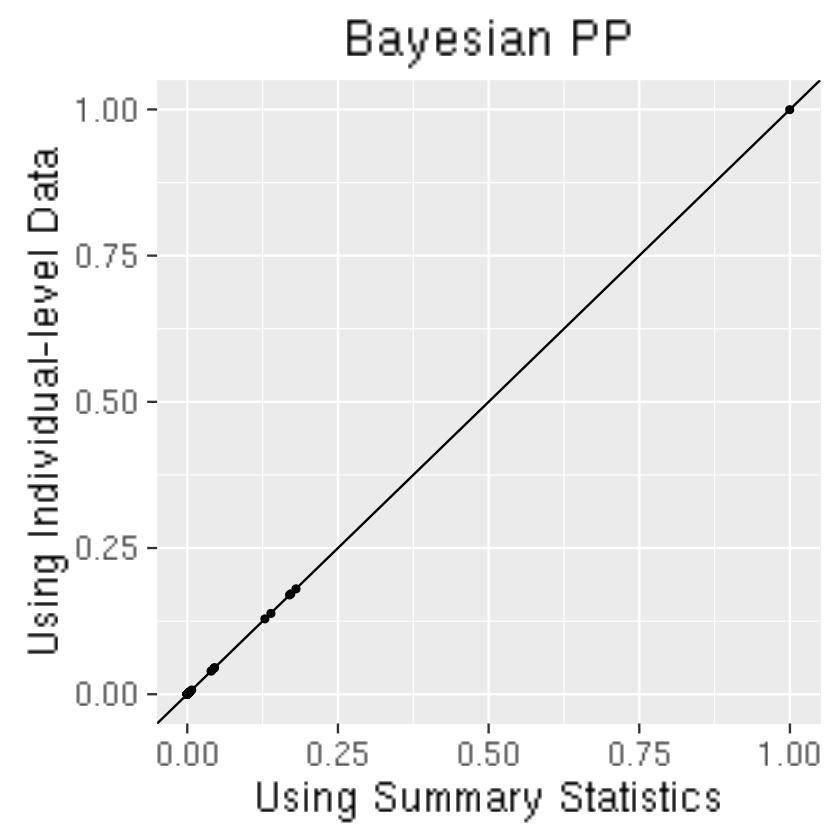

In [254]:
sum(paramdata_SS$pi)
sum(paramdata$pi)
#plot(paramdata_SS$pval_Chi2, paramdata$pval_LRT)

theme_set(theme_gray(base_size = 24))
qplot(paramdata_SS$pi, paramdata$pi, main = "Bayesian PP") + xlab("Using Summary Statistics") + 
    ylab("Using Individual-level Data") + xlim(0, 1) + ylim(0, 1) +
    geom_abline(intercept = 0, slope = 1)

#plot(paramdata_SS$beta[which(paramdata_SS$pi > 0.1068)], paramdata$beta[which(paramdata_SS$pi > 0.1068)])
#abline(0, 1)

In [255]:
a =  7.67;  b = 0.09 # 1KG example
(a - b) / a 

#a = 74; b = 17.8
#(a - b) / a 

[1] 0.988266